In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ds10012","key":"7e8fcd5773f6e7de447364f3a4e52106"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 63 Feb 15 12:27 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
#Give permissions to change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
#get dataset locally
!kaggle competitions download -c data-storm-10

  0% 0.00/213k [00:00<?, ?B/s]
100% 213k/213k [00:00<00:00, 82.4MB/s]
  0% 0.00/24.7k [00:00<?, ?B/s]
100% 24.7k/24.7k [00:00<00:00, 23.9MB/s]
  0% 0.00/825k [00:00<?, ?B/s]
100% 825k/825k [00:00<00:00, 52.3MB/s]
  0% 0.00/660k [00:00<?, ?B/s]
100% 660k/660k [00:00<00:00, 198MB/s]


In [7]:
!mkdir train
!unzip credit_card_default_train.csv -d train

Archive:  credit_card_default_train.csv.zip
  inflating: train/credit_card_default_train.csv  


In [221]:
#let see our data
import pandas as pd
from sklearn.utils import shuffle

credit = pd.read_csv('/content/train/credit_card_default_train.csv')
credit = shuffle(credit)
credit.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
11559,A14452,100K,F,High School,Single,46-65,-1,-1,-1,-1,-1,-1,6727,901,1802,1802,1802,901,901,1802,1802,1802,901,1802,0
2837,A3503,300K,M,Other,Other,31-45,0,0,0,0,-2,-2,55299,54451,55782,0,0,0,3465,2335,0,0,0,0,0
2895,A3579,500K,F,Graduate,Other,Less than 30,-1,0,-1,-1,-1,-1,22516,39801,457,2021,4567,4740,23218,457,2026,4578,4754,6789,0
23655,A29573,500K,F,Graduate,Single,31-45,-1,-1,-1,-1,-1,-1,3654,753,8390,4544,9129,23862,753,8390,4544,9205,23862,18480,1
5575,A6891,200K,F,Graduate,Other,31-45,0,0,0,0,0,0,112689,98619,79910,89646,94576,94373,11550,6930,11550,11550,6930,4620,0


In [222]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 11559 to 20658
Data columns (total 25 columns):
Client_ID             24000 non-null object
Balance_Limit_V1      24000 non-null object
Gender                24000 non-null object
EDUCATION_STATUS      24000 non-null object
MARITAL_STATUS        24000 non-null object
AGE                   24000 non-null object
PAY_JULY              24000 non-null int64
PAY_AUG               24000 non-null int64
PAY_SEP               24000 non-null int64
PAY_OCT               24000 non-null int64
PAY_NOV               24000 non-null int64
PAY_DEC               24000 non-null int64
DUE_AMT_JULY          24000 non-null int64
DUE_AMT_AUG           24000 non-null int64
DUE_AMT_SEP           24000 non-null int64
DUE_AMT_OCT           24000 non-null int64
DUE_AMT_NOV           24000 non-null int64
DUE_AMT_DEC           24000 non-null int64
PAID_AMT_JULY         24000 non-null int64
PAID_AMT_AUG          24000 non-null int64
PAID_AMT_SEP         

In [223]:
credit["Balance_Limit_V1"].describe()

count     24000
unique        8
top          1M
freq       5951
Name: Balance_Limit_V1, dtype: object

In [224]:
credit["NEXT_MONTH_DEFAULT"].describe()

count    24000.000000
mean         0.222083
std          0.415656
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: NEXT_MONTH_DEFAULT, dtype: float64

In [225]:
credit["MARITAL_STATUS"].describe()

count     24000
unique        2
top       Other
freq      13070
Name: MARITAL_STATUS, dtype: object

In [226]:
credit["EDUCATION_STATUS"].value_counts()

Other          11597
Graduate        8478
High School     3925
Name: EDUCATION_STATUS, dtype: int64

In [227]:
credit["AGE"].value_counts()

31-45           12124
Less than 30     7638
46-65            4150
More than 65       88
Name: AGE, dtype: int64

In [228]:
credit["MARITAL_STATUS"].value_counts()

Other     13070
Single    10930
Name: MARITAL_STATUS, dtype: int64

In [229]:
credit["Gender"].value_counts()

M    14460
F     9540
Name: Gender, dtype: int64

In [230]:
credit["NEXT_MONTH_DEFAULT"].value_counts()

0    18670
1     5330
Name: NEXT_MONTH_DEFAULT, dtype: int64

**Traiing set is not balnced**

In [231]:
credit.isnull().sum()

Client_ID             0
Balance_Limit_V1      0
Gender                0
EDUCATION_STATUS      0
MARITAL_STATUS        0
AGE                   0
PAY_JULY              0
PAY_AUG               0
PAY_SEP               0
PAY_OCT               0
PAY_NOV               0
PAY_DEC               0
DUE_AMT_JULY          0
DUE_AMT_AUG           0
DUE_AMT_SEP           0
DUE_AMT_OCT           0
DUE_AMT_NOV           0
DUE_AMT_DEC           0
PAID_AMT_JULY         0
PAID_AMT_AUG          0
PAID_AMT_SEP          0
PAID_AMT_OCT          0
PAID_AMT_NOV          0
PAID_AMT_DEC          0
NEXT_MONTH_DEFAULT    0
dtype: int64

<h1>Pre Processsing<h1>

---




In [0]:
from sklearn import preprocessing

In [0]:
credit['limit'] = credit.Balance_Limit_V1.copy()

In [234]:
for i in range (len(credit['limit'])):
  if (credit['limit'][i][-1]=='M'):
    credit['limit'][i]=int(float(credit['Balance_Limit_V1'][i][:-1])*1000000)
  elif (credit['limit'][i][-1]=='K'):
    credit['limit'][i]=int(float(credit['limit'][i][:-1])*1000)
  else:
    credit['limit'][i]=int(credit['limit'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [235]:
credit["limit"].describe()


count       24000
unique          8
top       1000000
freq         5951
Name: limit, dtype: int64

In [0]:
credit=credit.drop('Balance_Limit_V1',axis=1)

In [0]:
label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [0]:
def onehot(data):
  label_encoder = preprocessing.LabelEncoder()
  from sklearn.preprocessing import OneHotEncoder
  cat_encoder = OneHotEncoder()
  encoded = label_encoder.fit_transform(data)
  encoded_1hot=cat_encoder.fit_transform(encoded.reshape(-1,1))
  return encoded_1hot.toarray()


In [0]:
Gender_1hot_data  = onehot(credit["Gender"])
credit = credit.drop("Gender",axis=1)

In [240]:
print(Gender_1hot_data)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [241]:
Marital_status_1hot_data = onehot(credit["MARITAL_STATUS"])
print(Marital_status_1hot_data)
credit = credit.drop("MARITAL_STATUS",axis=1)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [0]:
credit["EDUCATION_STATUS"]=label_encoder.fit_transform(credit['EDUCATION_STATUS'])

In [0]:
credit["AGE"]=label_encoder.fit_transform(credit['AGE'])

In [244]:
print(credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 11559 to 20658
Data columns (total 23 columns):
Client_ID             24000 non-null object
EDUCATION_STATUS      24000 non-null int64
AGE                   24000 non-null int64
PAY_JULY              24000 non-null int64
PAY_AUG               24000 non-null int64
PAY_SEP               24000 non-null int64
PAY_OCT               24000 non-null int64
PAY_NOV               24000 non-null int64
PAY_DEC               24000 non-null int64
DUE_AMT_JULY          24000 non-null int64
DUE_AMT_AUG           24000 non-null int64
DUE_AMT_SEP           24000 non-null int64
DUE_AMT_OCT           24000 non-null int64
DUE_AMT_NOV           24000 non-null int64
DUE_AMT_DEC           24000 non-null int64
PAID_AMT_JULY         24000 non-null int64
PAID_AMT_AUG          24000 non-null int64
PAID_AMT_SEP          24000 non-null int64
PAID_AMT_OCT          24000 non-null int64
PAID_AMT_NOV          24000 non-null int64
PAID_AMT_DEC          2400

In [245]:
credit = credit.drop("Client_ID",axis=1)
credit.head()

,EDUCATION_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT,limit
11559,1,1,-1,-1,-1,-1,-1,-1,6727,901,1802,1802,1802,901,901,1802,1802,1802,901,1802,0,100000
2837,2,0,0,0,0,0,-2,-2,55299,54451,55782,0,0,0,3465,2335,0,0,0,0,0,300000
2895,0,2,-1,0,-1,-1,-1,-1,22516,39801,457,2021,4567,4740,23218,457,2026,4578,4754,6789,0,500000
23655,0,0,-1,-1,-1,-1,-1,-1,3654,753,8390,4544,9129,23862,753,8390,4544,9205,23862,18480,1,500000
5575,0,0,0,0,0,0,0,0,112689,98619,79910,89646,94576,94373,11550,6930,11550,11550,6930,4620,0,200000


In [246]:
output = credit[["NEXT_MONTH_DEFAULT"]].to_numpy()
credit = credit.drop("NEXT_MONTH_DEFAULT",axis=1)
print(output)

[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [247]:
credit.describe()

,EDUCATION_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,24000.000000,2.400000e+04
mean,1.129958,0.820417,-0.014208,-0.130042,-0.158667,-0.215542,-0.261167,-0.287667,1.188697e+05,1.140727e+05,1.092435e+05,1.003573e+05,9.377699e+04,9.034068e+04,1.330648e+04,1.386675e+04,1.209312e+04,1.122527e+04,11174.737208,1.230122e+04
std,0.905319,0.897701,1.124897,1.200566,1.198875,1.166608,1.131855,1.147847,1.710424e+05,1.652414e+05,1.614737e+05,1.490071e+05,1.417389e+05,1.387237e+05,3.935742e+04,5.648588e+04,4.065924e+04,3.624693e+04,36040.821759,4.233848e+04
min,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-3.824900e+05,-1.611850e+05,-1.420790e+05,-3.927000e+05,-1.878820e+05,-7.844830e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,8.246250e+03,6.968750e+03,6.238500e+03,5.429000e+03,4.179750e+03,2.913000e+03,2.310000e+03,1.956000e+03,9.010000e+02,6.930000e+02,610.000000,3.070000e+02
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.156850e+04,4.871700e+04,4.641150e+04,4.410500e+04,4.186300e+04,3.940900e+04,4.920000e+03,4.646500e+03,4.197000e+03,3.465000e+03,3465.000000,3.465000e+03
75%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.562745e+05,1.489050e+05,1.401622e+05,1.269750e+05,1.169262e+05,1.144352e+05,1.160500e+04,1.155000e+04,1.062600e+04,9.360000e+03,9411.500000,9.252500e+03
max,2.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.228020e+06,2.272881e+06,3.844046e+06,2.059564e+06,2.141765e+06,2.221444e+06,2.017905e+06,3.890638e+06,2.069852e+06,1.434510e+06,965557.000000,1.221218e+06


In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
raw_data = min_max_scaler.fit_transform(credit.values)

In [249]:
print(raw_data)
print(raw_data.shape)
print(credit.info())

[[5.00000000e-01 3.33333333e-01 1.00000000e-01 ... 9.33140146e-04
  1.47557602e-03 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 2.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 8.33333333e-02]
 [0.00000000e+00 6.66666667e-01 1.00000000e-01 ... 4.92358297e-03
  5.55920401e-03 1.66666667e-01]
 ...
 [5.00000000e-01 3.33333333e-01 2.00000000e-01 ... 3.39493163e-03
  2.26986500e-02 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 4.00000000e-01 ... 2.87088178e-03
  2.26986500e-03 1.25000000e-01]
 [1.00000000e+00 0.00000000e+00 2.00000000e-01 ... 1.90667149e-03
  1.73834647e-02 3.75000000e-01]]
(24000, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 11559 to 20658
Data columns (total 21 columns):
EDUCATION_STATUS    24000 non-null int64
AGE                 24000 non-null int64
PAY_JULY            24000 non-null int64
PAY_AUG             24000 non-null int64
PAY_SEP             24000 non-null int64
PAY_OCT             24000 non-null int64
PAY_NOV             24000 non

In [250]:
# %matplotlib inline
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import numpy as np

<h3>Correlation Analysis

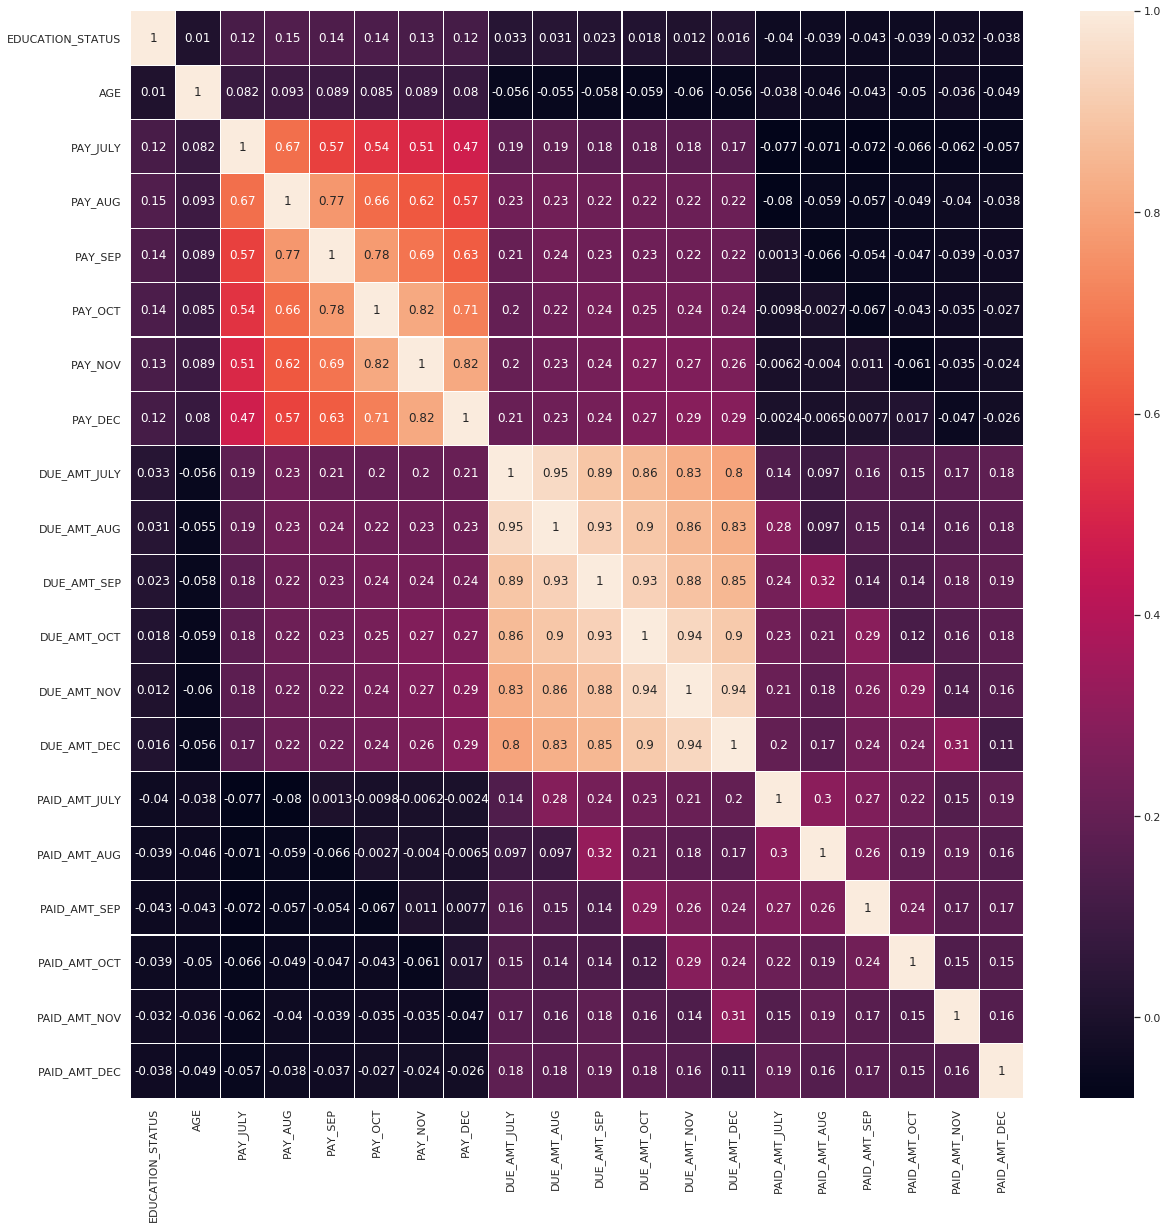

In [252]:
plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1)
sns.heatmap(credit.corr(), annot = True ,linewidths=.1)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [0]:
months_data = credit[["PAY_JULY",	"DUE_AMT_JULY",	"PAID_AMT_JULY",  "PAY_AUG",	"DUE_AMT_AUG",	"PAID_AMT_AUG",	"PAY_SEP", "DUE_AMT_SEP",	"PAID_AMT_SEP",	 "PAY_OCT",	"DUE_AMT_OCT",	"PAID_AMT_OCT", 	"PAY_NOV",	"DUE_AMT_NOV",	"PAID_AMT_NOV", 	"PAY_DEC",	"DUE_AMT_DEC",	"PAID_AMT_DEC", 	]]

In [255]:
months_data = min_max_scaler.fit_transform(months_data.values)
print(months_data[0])
#months_data = months_data.reshape(24000,18)
print(months_data.shape)

[0.1        0.14909615 0.0004465  0.1        0.06659063 0.00046316
 0.1        0.03609546 0.00087059 0.1        0.16087257 0.00125618
 0.1        0.08142178 0.00093314 0.1        0.26127847 0.00147558]
(24000, 18)


In [256]:
print(months_data[0])

[0.1        0.14909615 0.0004465  0.1        0.06659063 0.00046316
 0.1        0.03609546 0.00087059 0.1        0.16087257 0.00125618
 0.1        0.08142178 0.00093314 0.1        0.26127847 0.00147558]


In [0]:
credit= credit.drop(["PAY_JULY",	"DUE_AMT_JULY",	"PAID_AMT_JULY",  "PAY_AUG",	"DUE_AMT_AUG",	"PAID_AMT_AUG",	"PAY_SEP", "DUE_AMT_SEP",	"PAID_AMT_SEP",	 "PAY_OCT",	"DUE_AMT_OCT",	"PAID_AMT_OCT", 	"PAY_NOV",	"DUE_AMT_NOV",	"PAID_AMT_NOV", 	"PAY_DEC",	"DUE_AMT_DEC",	"PAID_AMT_DEC", 	],axis=1)

In [0]:
raw_data = min_max_scaler.fit_transform(np.asarray(credit.values,dtype=np.float64))

In [259]:
import numpy as np
print(np.count_nonzero(output == 1))
print(np.count_nonzero(output == 0))

5330
18670


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
import sklearn

In [0]:
month_input = keras.Input(shape=(18),name='month')
gender_input = keras.Input(shape=2,name='gender')
marital_input = keras.Input(shape=2,name='marital')
int_data_input = keras.Input(shape=3,name='intdata')

In [0]:
ker_init = keras.initializers.he_normal()
bias_init = keras.initializers.he_normal()

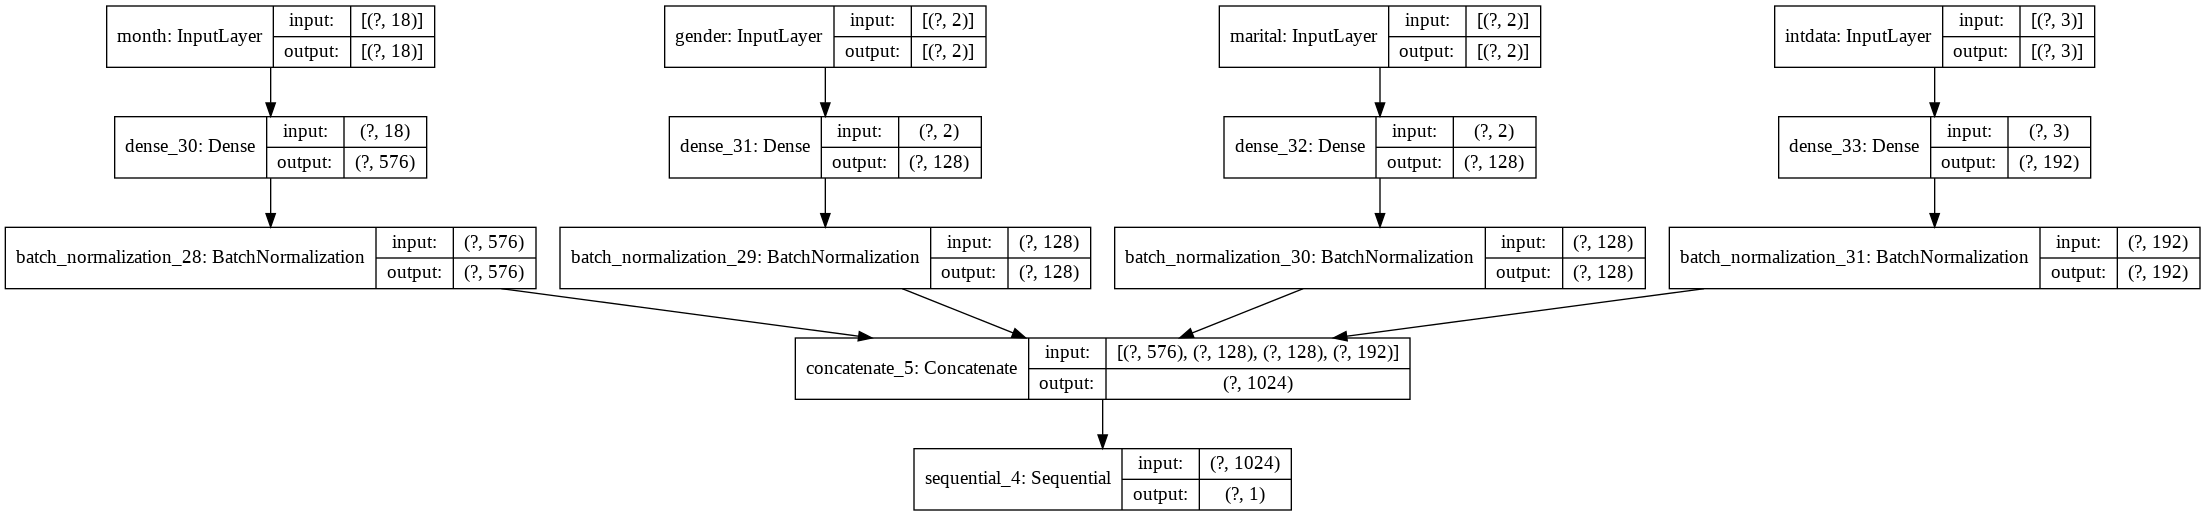

In [270]:
from tensorflow.keras import regularizers
month_processed = keras.layers.BatchNormalization(epsilon=0.1)(keras.layers.Dense(4*4*36,activation='selu')(month_input))
gender_processed = keras.layers.BatchNormalization(epsilon=0.1)(keras.layers.Dense(4*4*8,activation='selu')(gender_input))
marital_processed = keras.layers.BatchNormalization(epsilon=0.1)(keras.layers.Dense(4*4*8,activation='selu')(marital_input))
int_data_processed = keras.layers.BatchNormalization(epsilon=0.1)(keras.layers.Dense(4*4*12,activation='selu')(int_data_input))
x = keras.layers.concatenate([month_processed,gender_processed,marital_processed,int_data_processed])
inter_model = keras.models.Sequential([
                                       keras.layers.BatchNormalization(epsilon=0.1),
                                       keras.layers.Dense(512,activation='selu'),
                                       keras.layers.Dropout(0.5),
                                       keras.layers.BatchNormalization(epsilon=0.1),
                                       keras.layers.Dense(256,activation='selu'),
                                       keras.layers.Dropout(0.5),
                                       keras.layers.Dense(1,activation='sigmoid'),
                                       #keras.layers.Dense(1,activation='sigmoid',kernel_initializer=ker_init,bias_initializer=bias_init)
])
Default_prediction = inter_model(x)

model = keras.models.Model(inputs=[gender_input,month_input,marital_input,int_data_input],outputs=[Default_prediction])

keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)


In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
optimizer = keras.optimizers.Nadam(1e-3,clipvalue=0.75)
loss=tf.keras.losses.binary_crossentropy

model.compile(optimizer=optimizer,loss=loss,metrics=['acc',f1_m])

In [272]:
y_true = model.predict({'month':months_data[:100],'gender':Gender_1hot_data[:100],'marital':Marital_status_1hot_data[:100],'intdata':raw_data[:100]})
print(y_true[:10])

[[0.52761847]
 [0.5624492 ]
 [0.5975016 ]
 [0.5110767 ]
 [0.5534351 ]
 [0.5819878 ]
 [0.5602398 ]
 [0.49047995]
 [0.5941875 ]
 [0.58621705]]


In [0]:
epochs = 200

In [268]:
model_checkpoint = keras.callbacks.ModelCheckpoint('', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stoping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=epochs//6, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
reducelr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=epochs//20, verbose=0, mode='auto', min_delta=0.00001, cooldown=0, min_lr=0)
nan_terminate = keras.callbacks.TerminateOnNaN()

In [273]:
batch_size = 4800
model.fit({'month':months_data,'gender':Gender_1hot_data,'marital':Marital_status_1hot_data,'intdata':raw_data},
          y=output,
          callbacks=[reducelr,early_stoping],
          epochs=epochs,
          shuffle=True,
          #class_weight={0:float(np.count_nonzero(output == 1))/(float(np.count_nonzero(output == 1))+float(np.count_nonzero(output == 0))),1:float(np.count_nonzero(output == 0))/(float(np.count_nonzero(output == 1))+float(np.count_nonzero(output == 0)))},
          batch_size=batch_size,
          validation_split=0.2)

Train on 19200 samples, validate on 4800 samples
Epoch 1/200
19200/19200 [==============================] - 5s 278us/sample - loss: 1.2638 - acc: 0.5733 - f1_m: 0.3531 - val_loss: 1.0903 - val_acc: 0.2656 - val_f1_m: 0.3675
Epoch 2/200
19200/19200 [==============================] - 3s 133us/sample - loss: 0.8979 - acc: 0.6381 - f1_m: 0.3705 - val_loss: 0.7423 - val_acc: 0.3848 - val_f1_m: 0.3675
Epoch 3/200
19200/19200 [==============================] - 3s 133us/sample - loss: 0.7448 - acc: 0.6885 - f1_m: 0.3519 - val_loss: 0.7314 - val_acc: 0.4150 - val_f1_m: 0.3906
Epoch 4/200
19200/19200 [==============================] - 3s 136us/sample - loss: 0.6702 - acc: 0.7196 - f1_m: 0.3554 - val_loss: 0.6986 - val_acc: 0.4542 - val_f1_m: 0.4018
Epoch 5/200
19200/19200 [==============================] - 3s 132us/sample - loss: 0.6547 - acc: 0.7318 - f1_m: 0.3609 - val_loss: 0.6888 - val_acc: 0.4977 - val_f1_m: 0.4078
Epoch 6/200
19200/19200 [==============================] - 3s 130us/sample -

In [274]:
model.evaluate({'month':months_data,'gender':Gender_1hot_data,'marital':Marital_status_1hot_data,'intdata':raw_data},
          y=output,
          #class_weight={0:float(np.count_nonzero(output == 1))/(float(np.count_nonzero(output == 1))+float(np.count_nonzero(output == 0))),1:float(np.count_nonzero(output == 0))/(float(np.count_nonzero(output == 1))+float(np.count_nonzero(output == 0)))},
          batch_size=batch_size)

24000/24000 [==============================] - 1s 33us/sample - loss: 0.4278 - acc: 0.8210 - f1_m: 0.4930


[0.4278027415275574, 0.82104164, 0.4929747]

In [0]:
credit = pd.read_csv('/content/credit_card_default_test.csv')

In [276]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 24 columns):
Client_ID           6000 non-null object
Balance_Limit_V1    6000 non-null object
Gender              6000 non-null object
EDUCATION_STATUS    6000 non-null object
MARITAL_STATUS      6000 non-null object
AGE                 6000 non-null object
PAY_JULY            6000 non-null int64
PAY_AUG             6000 non-null int64
PAY_SEP             6000 non-null int64
PAY_OCT             6000 non-null int64
PAY_NOV             6000 non-null int64
PAY_DEC             6000 non-null int64
DUE_AMT_JULY        6000 non-null int64
DUE_AMT_AUG         6000 non-null int64
DUE_AMT_SEP         6000 non-null int64
DUE_AMT_OCT         6000 non-null int64
DUE_AMT_NOV         6000 non-null int64
DUE_AMT_DEC         6000 non-null int64
PAID_AMT_JULY       6000 non-null int64
PAID_AMT_AUG        6000 non-null int64
PAID_AMT_SEP        6000 non-null int64
PAID_AMT_OCT        6000 non-null int64
PAID_AM

In [0]:
credit['limit'] = credit.Balance_Limit_V1.copy()

In [278]:
for i in range (len(credit['limit'])):
  if (credit['limit'][i][-1]=='M'):
    credit['limit'][i]=int(float(credit['Balance_Limit_V1'][i][:-1])*1000000)
  elif (credit['limit'][i][-1]=='K'):
    credit['limit'][i]=int(float(credit['limit'][i][:-1])*1000)
  else:
    credit['limit'][i]=int(credit['limit'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
credit=credit.drop('Balance_Limit_V1',axis=1)

In [0]:
label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [0]:
def onehot(data):
  label_encoder = preprocessing.LabelEncoder()
  from sklearn.preprocessing import OneHotEncoder
  cat_encoder = OneHotEncoder()
  encoded = label_encoder.fit_transform(data)
  encoded_1hot=cat_encoder.fit_transform(encoded.reshape(-1,1))
  return encoded_1hot.toarray()

In [0]:
Gender_1hot_data  = onehot(credit["Gender"])
credit = credit.drop("Gender",axis=1)

In [283]:
Marital_status_1hot_data = onehot(credit["MARITAL_STATUS"])
print(Marital_status_1hot_data)
credit = credit.drop("MARITAL_STATUS",axis=1)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [0]:
credit["EDUCATION_STATUS"]=label_encoder.fit_transform(credit['EDUCATION_STATUS'])

In [0]:
credit["AGE"]=label_encoder.fit_transform(credit['AGE'])

In [286]:
credit = credit.drop("Client_ID",axis=1)
credit.head()

,EDUCATION_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,limit
0,2,0,0,0,0,0,0,0,194188,198510,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991,500000
1,2,0,0,0,0,0,0,0,87115,89427,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620,200000
2,2,2,-1,-1,2,0,0,-1,2693,9573,8984,11294,9561,993,6930,0,2310,0,2310,40060,400000
3,0,0,1,-1,-1,-2,-2,-2,0,5775,5775,0,0,0,5775,5775,0,0,0,0,1500000
4,1,2,0,0,-2,-2,-2,-2,85257,0,0,0,0,0,0,0,0,0,0,0,100000


In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
raw_data = min_max_scaler.fit_transform(credit.values)

In [0]:
months_data = credit[["PAY_JULY",	"DUE_AMT_JULY",	"PAID_AMT_JULY",  "PAY_AUG",	"DUE_AMT_AUG",	"PAID_AMT_AUG",	"PAY_SEP", "DUE_AMT_SEP",	"PAID_AMT_SEP",	 "PAY_OCT",	"DUE_AMT_OCT",	"PAID_AMT_OCT", 	"PAY_NOV",	"DUE_AMT_NOV",	"PAID_AMT_NOV", 	"PAY_DEC",	"DUE_AMT_DEC",	"PAID_AMT_DEC", 	]]

In [289]:
months_data = min_max_scaler.fit_transform(months_data.values)
print(months_data)

print(months_data.shape)

[[0.2        0.3077513  0.01947103 ... 0.22222222 0.33842474 0.02349127]
 [0.2        0.24807494 0.0053343  ... 0.22222222 0.12888177 0.00835422]
 [0.1        0.20102295 0.00984203 ... 0.11111111 0.04630421 0.0724394 ]
 ...
 [0.2        0.30466251 0.00807103 ... 0.22222222 0.123166   0.02088555]
 [0.1        0.20045669 0.         ... 0.22222222 0.07429834 0.00041771]
 [0.2        0.40013421 0.06561354 ... 0.22222222 0.34011152 0.08369589]]
(6000, 18)


In [0]:
credit= credit.drop(["PAY_JULY",	"DUE_AMT_JULY",	"PAID_AMT_JULY",  "PAY_AUG",	"DUE_AMT_AUG",	"PAID_AMT_AUG",	"PAY_SEP", "DUE_AMT_SEP",	"PAID_AMT_SEP",	 "PAY_OCT",	"DUE_AMT_OCT",	"PAID_AMT_OCT", 	"PAY_NOV",	"DUE_AMT_NOV",	"PAID_AMT_NOV", 	"PAY_DEC",	"DUE_AMT_DEC",	"PAID_AMT_DEC", 	],axis=1)

In [0]:
raw_data = min_max_scaler.fit_transform(np.asarray(credit.values,dtype=np.float64))

In [0]:
prediction = model.predict({'month':months_data,'gender':Gender_1hot_data,'marital':Marital_status_1hot_data,'intdata':raw_data})

In [293]:
prediction

array([[0.0822918 ],
       [0.26220366],
       [0.11101284],
       ...,
       [0.14765818],
       [0.12270223],
       [0.09235326]], dtype=float32)

In [0]:
output_file = open('output.txt','w')
for value in prediction:
  output_file.write(str(value)+'\n')